## Dataset description
Here is  a breif description of the data used.
  <br>I used the train.csv which has labelled data.
  <br>A full training dataset with the following attributes;
* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable:
    * 1: unreliable
    * 0: reliable
        
<br>You can get the dataset by downloading it here <a href="https://www.kaggle.com/competitions/fake-news/data">Kaggle<a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer #converts texts into numbers
from sklearn.model_selection import train_test_split #splits data into training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
news_dataset=pd.read_csv('train.csv')
news_dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Data preprocessing

In [4]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
news_dataset.shape

(20800, 5)

In [6]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
#checking for null values in the data
news_dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
#Handling null values in the dataset
news_dataset=news_dataset.fillna('')

In [10]:
#checking for duplicates
news_dataset.duplicated().sum()

0

In [11]:
#checking for unique values in the dataset
news_dataset.nunique()

id        20800
title     19804
author     4202
text      20387
label         2
dtype: int64

In [12]:
news_dataset["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

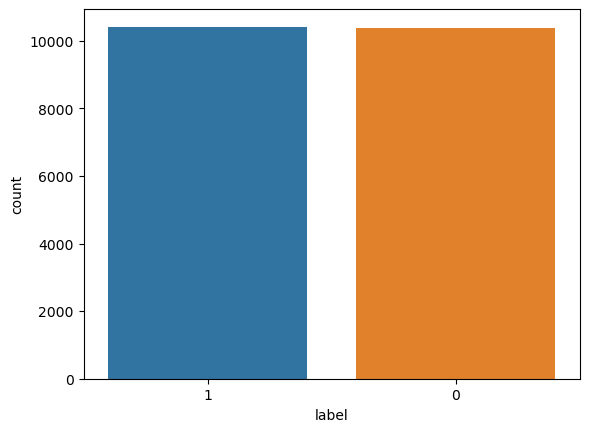

In [13]:
#visual representation of label column
sns.countplot(data=news_dataset,x='label',order=news_dataset['label'].value_counts().index)

In [14]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords  #removes words that don't add value to the article
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
news_dataset.head(5)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [16]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [17]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [18]:
Y.shape

(20800,)

In [19]:
port_stem = PorterStemmer()

In [20]:
#creating a function stemming because it is not inbuilt

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

#Let's unpack the above code

def stemming(content):
    #the word 'content' when definig the function, is not because we named a column content after merging.
    #you can use any word and it will do the same

    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    #we are calling the re library that we imported. 
    #the function 'sub' subtitutes values
    # this bit '[^a-zA-Z]' is used to remove everything that is not alphabets
    #the dataset has numbers, and punctuation marks so it removes them
    # (' ') there is a space in between, all the unwanted in the dataset will be replaced by a space 
    #it will then feed all changes into 'content' now the columns we merged

    stemmed_content = stemmed_content.lower()
    #converting all to lowercase. 
    #why? the model might interpret upper and lower to be different things
    stemmed_content = stemmed_content.lower()
    #converting all to lowercase. 
    #why? the model might interpret upper and lower to be different things

    stemmed_content = stemmed_content.split()
    #converting the words into a list

    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #stemming using the function port_stem and removing stopwords using the function port_stem

    stemmed_content = ' '.join(stemmed_content)
    #join all the words

    return stemmed_content



In [21]:
#applying the above function to the content column
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

In [ ]:
Y.shape

### Splitting the dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

## Building and training the model

In [ ]:
#load the model in a variable
model = LogisticRegression()

In [ ]:
#training the model
model.fit(X_train, Y_train)

## Evaluating the model 

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

## making a prediction system

In [ ]:
X_new = X_test[9] #keep changing the integer to see if your model predicts correct

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

In [ ]:
print(Y_test[9])

# saving the model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

# loading the model

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

In [ ]:
Xt

In [ ]:
import uvicorn
from fastapi import FastAPI


In [ ]:
app=FastAPI()
model= pickle.load(open('model.pkl', 'rb'))
@app.post('/predict')
async def predict(title,author,text,label):
    data=pd.Dataframe([[title,author,text,label]])
    data.columns=['id','title','auhtor','text','label']
    
    predictions=pickled_model.predict(model,data=data)
    return {'predictions':predictions}

if __name__ == '__main__':
    main()